**BASIC LIBRARY IMPORTS**

In [47]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

In [48]:
dataset = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\data\data.csv")
genreby = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\data\data_by_artist.csv")
yearby = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\data\data_by_year.csv")

In [49]:
dataset.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [23]:
dataset.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS**

<AxesSubplot:xlabel='mode', ylabel='count'>

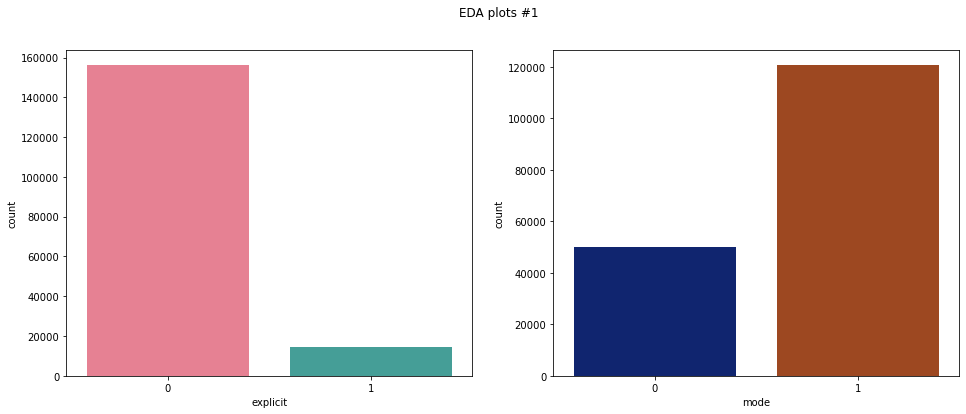

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

fig.suptitle('EDA plots #1')

sns.countplot(ax=axes[0],x='explicit',data=dataset,palette='husl')
sns.countplot(ax=axes[1],x='mode',data=dataset,palette='dark')

***Converting release date to datetime data type column. This is then converted to 'Year' column.***

In [25]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])
dataset['year'] = dataset['release_date'].apply(lambda time: time.year)

***Histogram of Popularity column***

<AxesSubplot:xlabel='popularity', ylabel='Count'>

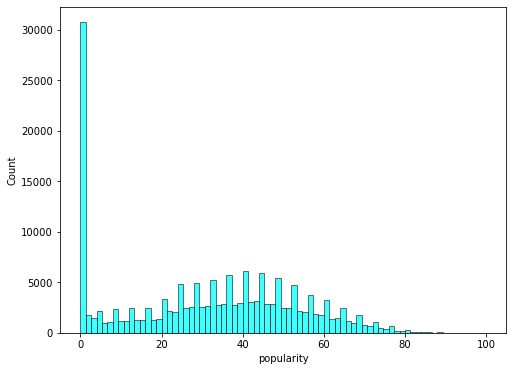

In [46]:
plt.figure(figsize=(8,6))
sns.histplot(x='popularity',data=dataset,color="cyan")

In [27]:
df = dataset[dataset['popularity']>85][['name','artists','popularity','year']]
fig = px.scatter(df,x='year', y='popularity',color='name')
fig.show()

***Correlation of Features***

<AxesSubplot:>

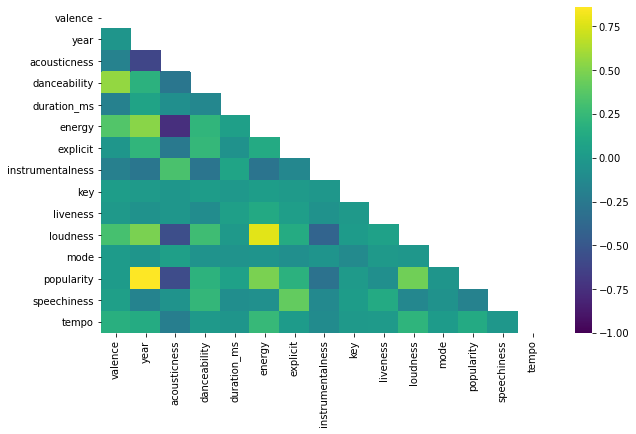

In [28]:
plt.figure(figsize=(10,6))

corr = dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,mask=mask,vmin=-1,cmap='viridis',annot=False)

In [29]:
corr[abs(corr['popularity']) > 0.25]['popularity']

year                0.862442
acousticness       -0.573162
energy              0.485005
instrumentalness   -0.296750
loudness            0.457051
popularity          1.000000
Name: popularity, dtype: float64

***Observations***

**Positive Correlation**                                        
*Energy, Loudness and Year*

**Negative Correlation**\
*Acousticness, Instrumentalness*


***Artists Popularity***

**I go with the popularity plotting of 5 favorite artists of mine.**

- Kehlani
- The Weeknd
- Doja Cat
- Billie Eilish
- Halsey

In [64]:
keh = dataset[dataset['artists'].str.contains('Kehlani')]
weeknd = dataset[dataset['artists'].str.contains('The Weeknd')]
dj = dataset[dataset['artists'].str.contains('Doja Cat')]
be = dataset[dataset['artists'].str.contains('Billie Eilish')]
hl = dataset[dataset['artists'].str.contains('Halsey')]

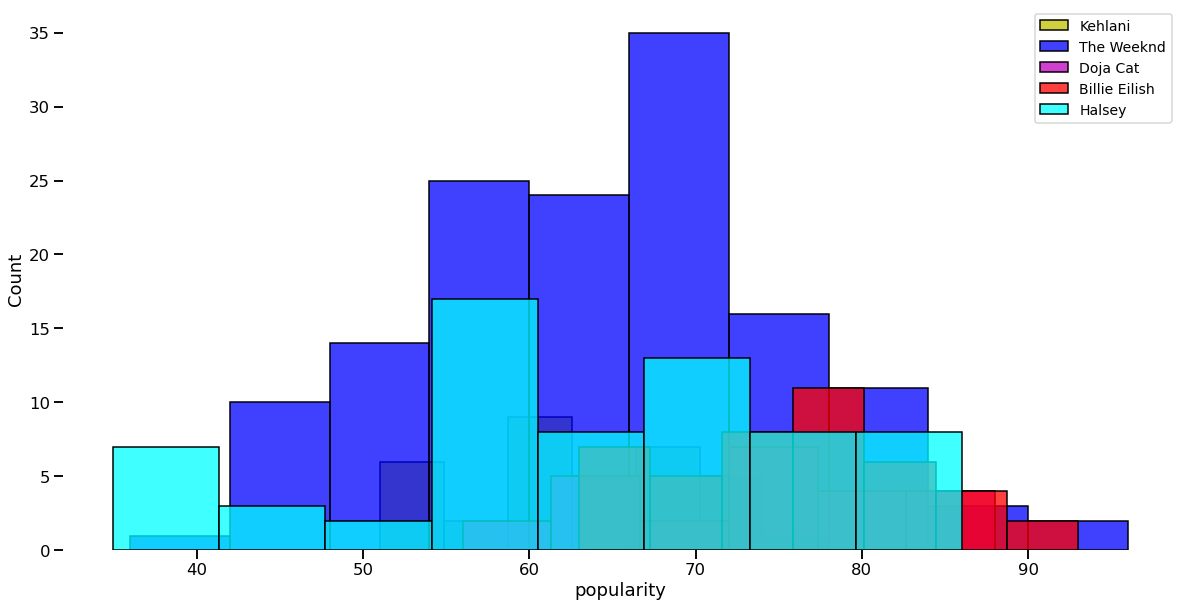

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("talk",font_scale=1, rc={"lines.linewidth": 2.5})

sns.histplot(keh['popularity'], color='y',label="Kehlani")
sns.histplot(weeknd['popularity'], color='b',label="The Weeknd")
sns.histplot(dj['popularity'], color='m',label="Doja Cat")
sns.histplot(be['popularity'], color='r',label="Billie Eilish")
sns.histplot(hl['popularity'], color='cyan',label="Halsey")


ax.legend(fontsize = 14)

**The Weeknd has the highest popularity from these artists.**

**CLUSTERING ALGORITHMS**

***Selecting only numeric datatype values***

In [66]:
df = dataset.select_dtypes(np.number)
number_cols = list(df.columns)

***We need to scale our feature data to a given range so that the clustering algorithm can be unbiased.***

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X = scaler.fit_transform(df.values)

scaled_df = pd.DataFrame(scaled_X,columns=df.columns)

***We need to reduce the number of features, for dimensionality reduction we use PCA***

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca.fit(scaled_df)

pca_df = pca.transform(scaled_df)

In [33]:
from sklearn import metrics
dict1 = {}

***Mini-Batch KMeans Clustering***

*Mini Batch K-means algorithm‘s main idea is to use small random batches of data of a fixed size, so they can be stored in memory. Each iteration a new random sample from the dataset is obtained and used to update the clusters and this is repeated until all the clusters are formed.*

In [90]:
from sklearn.cluster import MiniBatchKMeans

In [118]:
mbk = MiniBatchKMeans(n_clusters = 6,random_state=23,batch_size=3200 )
mbk.fit(pca_df)

MiniBatchKMeans(batch_size=3200, n_clusters=6, random_state=23)

In [119]:
spotify_minik = dataset.copy()
spotify_minik['cluster_label'] = mbk.predict(pca_df)

**Calinski-Harabasz index**

*The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters,the higher the score,the better the performances.*

In [120]:
x = metrics.calinski_harabasz_score(pca_df, spotify_minik['cluster_label'])
print(x) #MINI-BATCH KMEANS
dict1['MINI-BATCH KMEANS']= x

144103.5649804303


**MAKING THE RECOMMENDER SYSTEMS**

In [128]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import euclidean_distances
from collections import defaultdict

In [129]:
features = ['valence', 'year', 'acousticness',
            'danceability', 'duration_ms', 'energy',
            'explicit','instrumentalness', 'key', 
            'liveness', 'loudness', 'mode',
            'popularity','speechiness', 'tempo']

other_cols = ['year', 'name',  'artists']

In [130]:
song_cluster_pipeline = Pipeline([('Scaler', StandardScaler()), 
                                  ('Mini Batch KMeans', MiniBatchKMeans(batch_size = 2050))])
X = dataset[features]
song_cluster_pipeline.fit(X)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Mini Batch KMeans', MiniBatchKMeans(batch_size=2050))])

***Collecting all song lists***

In [131]:
def input_(song_list, dataset):
    song_vectors = []
    
    for song in song_list:
        try:
            song_data = dataset[(dataset['name'] == song['name']) & (dataset['year'] == song['year'])].iloc[0]
        except IndexError:
            song_data = None
            
        if song_data is None:
            print('Warning : {} does not exist in our database'.format(song['name']))
            continue
        song_vectors.append(song_data[features].values)
    return np.mean(np.array(list(song_vectors)), axis = 0)

***Making the recommender function***

In [132]:
def Music_Recommender(song_list, dataset, n_songs=10):

    groupby_input_tracks = dataset.groupby(song_list)
    song_center = input_(song_list, dataset)
    
    
    scaler = song_cluster_pipeline.steps[0][1]
    scaled_data = scaler.transform(dataset[features])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    
    
    ed_dist = euclidean_distances(scaled_song_center, scaled_data)

    
    index = list(np.argsort(ed_dist)[:,:n_songs][0])
    rec_output = dataset.iloc[index]
  
    
    return rec_output[other_cols]

***Generating the recommended songs***

In [133]:
results = Music_Recommender([{'name': 'I Like It', 'year': 2018},
                                          {'name': 'No Guidance (feat. Drake)', 'year': 2019},
                                          {'name': 'How You Like That', 'year': 2020}],dataset)
results

,year,name,artists
19677,2020,nasty,['Ariana Grande']
19607,2020,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']"
18696,2015,King Kunta,['Kendrick Lamar']
108863,2020,Sucks To Be You,['SAINt JHN']
170468,2020,For The Night (feat. Lil Baby & DaBaby),"['Pop Smoke', 'Lil Baby', 'DaBaby']"
57365,2020,That Way,['Lil Uzi Vert']
19635,2020,my ex's best friend (with blackbear),"['Machine Gun Kelly', 'blackbear']"
57251,2020,Ashes,['Stellar']
75134,2020,That Way - Bonus Track,['Lil Uzi Vert']
140744,2020,Why Do You Lie To Me (feat. Lil Baby),"['Topic', 'A7S', 'Lil Baby']"
